In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Seep 2025/auto-mpg.csv")

# Creating copy
df_copy = df.copy()

In [ ]:
# Handle non-numeric values in 'horsepower'
df_copy["horsepower"] = df_copy["horsepower"].replace('?', np.nan)
df_copy.dropna(subset=["horsepower"], inplace=True)
df_copy["horsepower"] = df_copy["horsepower"].astype(float)

In [ ]:
# Feature Engineering
df_copy['displacement_on_power'] = df_copy['displacement'] / df_copy['horsepower']
df_copy['weight_on_cylinder'] = df_copy['weight'] / df_copy['cylinders']
df_copy['acceleration_on_power'] = df_copy['acceleration'] / df_copy['horsepower']
df_copy['acceleration_on_cylinder'] = df_copy['acceleration'] / df_copy['cylinders']

In [ ]:
# Define features and target
features = [
    "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year",
    'displacement_on_power', 'weight_on_cylinder', 'acceleration_on_power', 'acceleration_on_cylinder'
]
X = df_copy[features]
y = df_copy["mpg"]

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Define parameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10.0, 100.0]}

In [ ]:
grid_search = GridSearchCV(Ridge(), param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_['alpha']
print("Best hyperparameters:", best_params)

Best hyperparameters: 0.1


In [ ]:
final_model = Ridge(alpha=best_params)
final_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred = final_model.predict(X_test)
print("🔹 Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("🔹 Root MSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("🔹 R² Score:", r2_score(y_test, y_pred))

🔹 Mean Squared Error (MSE): 7.960563260024464
🔹 Root MSE: 2.82144701527859
🔹 R² Score: 0.8440346337224681


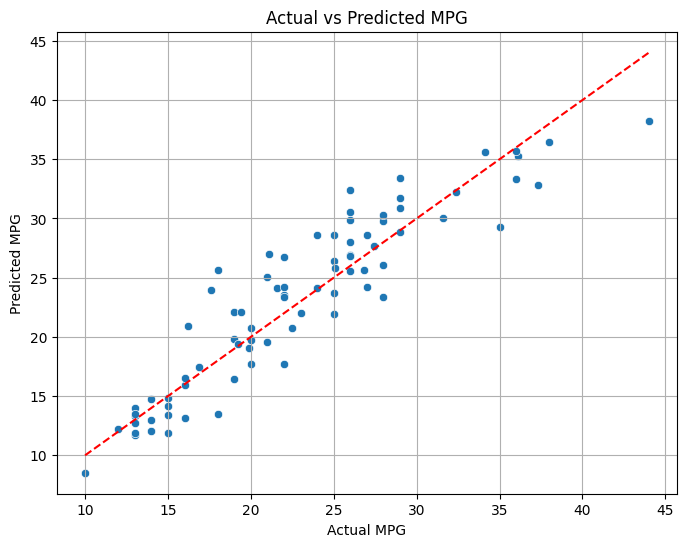

In [ ]:
# Visualize actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)
plt.show()

In [ ]:
# cylinders = float(input("Enter number of cylinders: "))
# displacement = float(input("Enter engine displacement: "))
# horsepower = float(input("Enter horsepower: "))
# weight = float(input("Enter weight (lbs): "))
# acceleration = float(input("Enter acceleration (0-60 time): "))
# model_year = float(input("Enter model year (e.g., 82 for 1982): "))

# # Step 2: Create DataFrame
# new_car = pd.DataFrame({
#     "cylinders": [cylinders],
#     "displacement": [displacement],
#     "horsepower": [horsepower],
#     "weight": [weight],
#     "acceleration": [acceleration],
#     "model year": [model_year]
# })

# new_car["displacement_on_power"] = new_car["displacement"] / new_car["horsepower"]
# new_car["weight_on_cylinder"] = new_car["weight"] / new_car["cylinders"]
# new_car["acceleration_on_power"] = new_car["acceleration"] / new_car["horsepower"]
# new_car["acceleration_on_cylinder"] = new_car["acceleration"] / new_car["cylinders"]

# # Step 3: Predict using the trained model
# predicted_mpg = final_model.predict(new_car)

# # Step 4: Display prediction
# print(f"Predicted MPG: {predicted_mpg}")


Enter number of cylinders: 8
Enter engine displacement: 2000
Enter horsepower: 100
Enter weight (lbs): 2000
Enter acceleration (0-60 time): 60
Enter model year (e.g., 82 for 1982): 82
Predicted MPG: [-20.94764107]


In [89]:
import pickle

# Specify the filename
filename = '/content/drive/MyDrive/Seep 2025/Advance_mpg_regression_model.pkl'

# Save the model to the file
pickle.dump(final_model, open(filename, 'wb'))

print(f"Model exported successfully to {filename}")

Model exported successfully to /content/drive/MyDrive/Seep 2025/Advance_mpg_regression_model.pkl
